## Problem Statement
- Load data set 
- Outlier removal - Standard Deviation method
- Outlier removal - Interquartile method

#### Load Python libraries and dataset

In [ ]:
import pandas as pd
from sklearn.datasets import load_diabetes
from numpy import mean, std
from numpy.random import randn
from numpy import percentile
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [ ]:
# generate univariate observations
data = 5 * randn(10000) + 50
print(f"length of data - {len(data)}\n")
print(data)

### Visualize Outliers using Box and Whisker Plots

In [ ]:
# Visualize Outliers
pyplot.boxplot(data)
pyplot.show()
# Check Statistical properties of each attribute
#X_data = pd.DataFrame(data=data)### Density distribution of data after Standardization
#X_data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(15,15))
#pyplot.show()

## Outlier Removal - Standard Deviation Method
- Actually, Gaussian distribution has the property that the standard deviation from the mean can be used to summarize the percentage of values in the sample.  
- For example, 
    - within one standard deviation of the mean will cover 68 percent of the data. 
    - So, if the mean is 50 and the standard deviationis 5, as in the test dataset above, then all data in the sample between 45 and 55 will account for about 68 percent of the data sample. 
- More data samples can be coverd if we expand the range as follows:
    - 1 Standard Deviation from the Mean: 68 percent.
    - 2 Standard Deviations from the Mean: 95 percent.
    - 3 Standard Deviations from the Mean: 99.7 percent.
    
 - So, if we know that the distribution of values is Gaussian or Gaussian-like then we can use the **standard deviation** of the data as a cut-off for identifying outliers. 

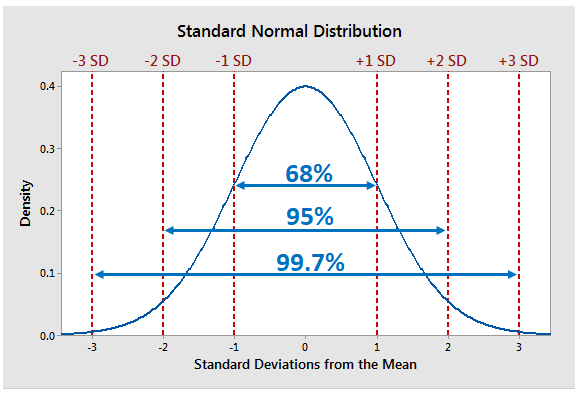

#### Identify Outliers with Cut-off range
Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like
distribution.

In [ ]:
# calculate summary statistics
data_mean, data_std = mean(data), std(data)
# define outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

#### Remove Outliers

In [ ]:
print(f"Length of data before outlier removal - {len(data)}\n")
data_outliers_removed = [x for x in data if x >= lower and x <= upper]
print(f"Length of data after outlier removal - {len(data_outliers_removed)}\n")

## Outlier Removal - Interquartile Method
- Practically, all data is not normal or normal enough to treat it as being drawn from a Gaussian distribution.
- A good statistic for summarizing a non-Gaussian distribution sample of data is the ** Interquartile Range**, or **IQR**.
- The IQR is calculated as the difference between the 75th and the 25th percentiles of the data and defines the box in a box and whisker plot. 


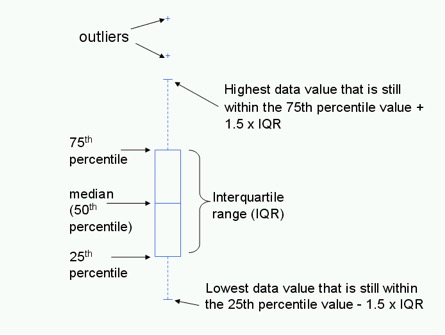

#### Calulate Interquartile Range

In [ ]:
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print(f'Percentiles: \n============== \n 25th -> {q25}, \n 75th -> {q75}, \n IQR  -> {iqr}')

#### Calculate the outlier cutoff

In [ ]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print(f'Lower cut-off : {lower}\nUpper cut-off : {upper}')

#### Identify Outlers outside of lower and upper cu-off values

In [ ]:
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

#### Remove Outliers 

In [ ]:
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

In [ ]:
q25, q75 = percentile(outliers_removed, 25), percentile(outliers_removed, 75)
iqr = q75 - q25
print(f'Percentiles: \n============== \n 25th -> {q25}, \n 75th -> {q75}, \n IQR  -> {iqr}')

In [ ]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
print(f'Lower cut-off : {lower}\nUpper cut-off : {upper}')

In [ ]:
outliers = [x for x in outliers_removed if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

#### Visualize data after outlier removal 

In [ ]:
# Visualize Non-Outliers
pyplot.boxplot(outliers_removed)
pyplot.grid()
pyplot.show()

## Outlier Detection - Local Outlier Factor
The local outlier factor (LOF), is a technique that attempts to harness the idea of nearest neighbors for outlier detection.

In [ ]:
data = pd.read_csv("../data/pima-indians-diabetes.csv")

#### Split data into train and test saamples

In [ ]:
data_array = data.values
X = data_array[:,0:8]
y = data_array[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# summarize the shape of the dataset
print("Features and class distribution\n==================================")
print(f'X shape -> {X.shape}\ny shape -> {y.shape}')
# summarize the shape of the train and test sets
print("\nTrain Test distribution\n==================================")
print(f'X_train.shape -> {X_train.shape}\nX_test.shape -> {X_test.shape}\ny_train.shape -> {y_train.shape}\ny_test.shape -> {y_test.shape}')

In [ ]:
# Identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
# print(yhat)
# select all the rows that are not outliers
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
print("\nTrain Test distribution\n==================================")
print(f'X_train.shape -> {X_train.shape}\ny_train.shape -> {y_train.shape}')

#### Inference LOF
- we can observe that number of samples in the training dataset has been reduced from 514 to 487. 
- This shows that 37 rows containing outliers were identified and removed. 